In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"JKSE.csv")
df2 = pd.read_csv(r"BBRI.csv")
df3 = pd.read_csv(r"BBNI.csv")
df4 = pd.read_csv(r"BMRI.csv")

In [13]:
print('JKSE\n', df)
print('\nBBRI\n', df2)
print('\nBBNI\n', df3)
print('\nBMRI\n', df4)

JKSE
            Date         Open         High          Low        Close  \
0    2018-11-16  5975.110840  6058.825195  5968.673828  6012.350098   
1    2018-11-19  6028.336914  6036.988770  5974.134766  6005.296875   
2    2018-11-20          NaN          NaN          NaN          NaN   
3    2018-11-21  5942.199219  5978.595215  5908.002930  5948.051758   
4    2018-11-22  5936.661133  5997.637207  5936.661133  5990.810059   
5    2018-11-23  5998.027832  6017.458008  5971.988770  6006.202148   
6    2018-11-26  5997.732910  6025.991211  5990.984863  6022.777832   
7    2018-11-27  6002.391113  6034.184082  5992.883789  6013.588867   
8    2018-11-28  6027.582031  6030.895996  5990.345215  5991.246094   
9    2018-11-29  6030.738770  6107.167969  6029.661133  6107.167969   
10   2018-11-30  6104.637207  6117.194824  6056.124023  6056.124023   
11   2018-12-03  6118.063965  6157.300781  6101.743164  6118.319824   
12   2018-12-04  6118.633789  6152.859863  6118.469238  6152.859863   


In [14]:
adj_close = df['Close']
adj_close2 = df2['Adj Close']
adj_close3 = df3['Adj Close']
adj_close4 = df4['Adj Close']

In [15]:
time = np.linspace(1, len(adj_close), len(adj_close))
time2 = np.linspace(1, len(adj_close2), len(adj_close2))
time3 = np.linspace(1, len(adj_close3), len(adj_close3))
time4 = np.linspace(1, len(adj_close4), len(adj_close4))

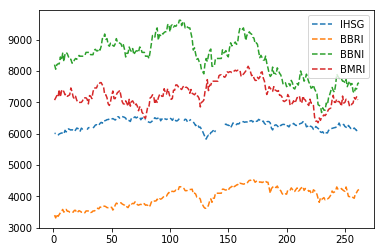

In [16]:
plt.plot(time, adj_close, label = 'IHSG', ls = '--')
plt.plot(time2, adj_close2, label = 'BBRI', ls = '--')
plt.plot(time3, adj_close3, label = 'BBNI', ls = '--')
plt.plot(time4, adj_close4, label = 'BMRI', ls = '--')
plt.legend(loc = 'upper right')

In [17]:
def daily_return(adj_close):
    returns = []
    for i in range(0, len(adj_close)-1):
        today = adj_close[i+1]
        yesterday = adj_close[i]
        daily_return = (today - yesterday)/yesterday
        returns.append(daily_return)
    return returns

returns = daily_return(adj_close)
returns2 = daily_return(adj_close2)
returns3 = daily_return(adj_close3)
returns4 = daily_return(adj_close4)

mu = np.mean(returns)*252           #koef drift
sig = np.std(returns)*np.sqrt(252.) # koef diffusion

mu2 = np.mean(returns2)*252           #koef drift
sig2 = np.std(returns2)*np.sqrt(252.) # koef diffusion

mu3 = np.mean(returns3)*252           #koef drift
sig3 = np.std(returns3)*np.sqrt(252.) # koef diffusion

mu4 = np.mean(returns4)*252           #koef drift
sig4 = np.std(returns4)*np.sqrt(252.) # koef diffusion




In [18]:
print(mu, sig)
print(mu2, sig2)
print(mu3, sig3)
print(mu4, sig4)

nan nan
0.2340017382494665 0.22393962491770672
-0.03822292821823298 0.2542499993388419
0.03371771539270439 0.2577119951145115


In [19]:
#GBM Exact Solution
#parameter
#so     : initial stock price
#mu     : koef. drift
#sig    : koef. diff.
#W      : brown motion
#T      : Time Period
#N      : number of increment

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


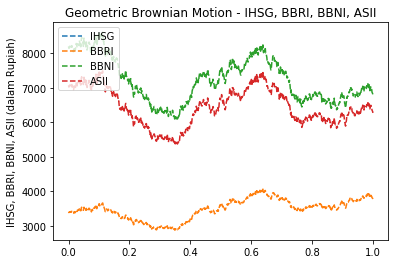

In [12]:
def brownian(seed, N):
    np.random.seed(seed)
    dt = 1./N
    b = np.random.normal(0.,1.,int(N))*np.sqrt(dt)
    W = np.cumsum(b)
    return W, b

def GBM(so, mu, sig, W, T, N):
    t = np.linspace(0., 1., N+1)
    s = []
    s.append(so)
    for i in range(1, int(N+1)):
        drift = (mu - 0.5*sig**2)*t[i]
        diffusion = sig*W[i-1]
        s_temp = so*np.exp(drift+diffusion)
        s.append(s_temp)
    return s, t

N = 2.**10
seed = 1000
W = brownian(seed, N)[0]
T= 1.

so = adj_close[0] #intial value stock price
sol = GBM(so, mu, sig, W, T, N)[0]  #exact solution
t = GBM(so, mu, sig, W, T, N)[1]    #time increments for plotting

so = adj_close2[0] #intial value stock price
sol2 = GBM(so, mu2, sig2, W, T, N)[0]  #exact solution
t2 = GBM(so, mu2, sig2, W, T, N)[1]    #time increments for plotting

so = adj_close3[0] #intial value stock price
sol3 = GBM(so, mu3, sig3, W, T, N)[0]  #exact solution
t3 = GBM(so, mu3, sig3, W, T, N)[1]    #time increments for plotting

so = adj_close4[0] #intial value stock price
sol4 = GBM(so, mu4, sig4, W, T, N)[0]  #exact solution
t4 = GBM(so, mu4, sig4, W, T, N)[1]    #time increments for plotting

plt.plot(t, sol, label = 'IHSG', ls = '--')
plt.plot(t2, sol2, label = 'BBRI', ls = '--')
plt.plot(t3, sol3, label = 'BBNI', ls = '--')
plt.plot(t4, sol4, label = 'BMRI', ls = '--')
plt.ylabel('IHSG, BBRI, BBNI, ASII (dalam Rupiah)')
plt.title('Geometric Brownian Motion - IHSG, BBRI, BBNI, ASII')
plt.legend(loc = 'upper left')